### 对数几率回归模型：
#### 

所需库：

In [1]:
import numpy as np
import csv
from matplotlib import pyplot as plt

对数几率回归模型（逻辑回归模型）

In [2]:
class LogisticRegression:
    # 初始化学习率和迭代次数
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    # sigmoid函数
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # fit函数 用于梯度下降求解w和b
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        
        for _ in range(self.iterations):
            model = np.dot(X, self.weights) + self.bias
            prediction = self.sigmoid(model)
            
            dw = (1 / m) * np.dot(X.T, (prediction - y))
            db = (1 / m) * np.sum(prediction - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    # 预测函数 用于对测试样本进行预测
    def predict(self, X):
        """进行预测"""
        model = np.dot(X, self.weights) + self.bias
        prediction = self.sigmoid(model)
        return [1 if i > 0.5 else 0 for i in prediction]
    
    def accuracy_score(self,y_true, y_pred):
        """计算准确率"""
        correct_predictions = sum(y_pred[i] == y_true[i] for i in range(len(y_true)))
        accuracy = correct_predictions / len(y_true)
        return accuracy

    def coef_(self):
        """返回w"""
        return self.weights
    
    def intercept_(self):
        """返回b"""
        return self.bias
    
    def train_test_split(self,X, y, test_size=0.2, random_state=None):
        """将数据集划分为训练集和测试集"""
        if random_state:
            np.random.seed(random_state)
        
        # 随机打乱索引
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        
        # 根据test_size计算测试集大小
        test_set_size = int(X.shape[0] * test_size)
        
        # 划分测试集和训练集
        test_indices = indices[:test_set_size]
        train_indices = indices[test_set_size:]
        
        # 划分数据集
        X_train = X[train_indices]
        X_test = X[test_indices]
        y_train = y[train_indices]
        y_test = y[test_indices]
        
        return X_train, X_test, y_train, y_test 

对于西瓜数据集的处理和模型训练

Accuracy: 0.7647058823529411


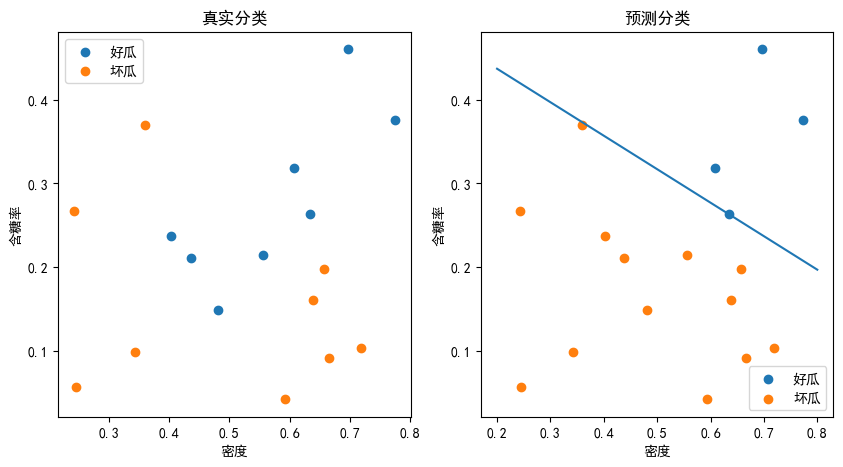

In [3]:
f=open(r'data/watermelon_3a.csv',encoding='GB2312')
reader=csv.reader(f)
rows=[row for row in reader]        #rows[i]=[编号,密度,含糖率,好瓜]
X=[]                                #样本集
y=[]                                #标签值
for i in range(1,len(rows)):
    X.append([float(rows[i][1]),float(rows[i][2])])
    y.append(int(rows[i][4]))
X=np.array(X)                       #将list转变成numpy数组
y=np.array(y)        

# 加载数据集
model = LogisticRegression(0.03,1000)
model.fit(X, y)
predictions = model.predict(X)
y_pred=np.array(predictions)
accuracy = model.accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

# 计算
pred1=[]                            #预测正类的样本点集合
pred0=[]                            #预测负类的样本点集合
for i in range(len(y_pred)):
    if(y_pred[i]==1):
        pred1.append([X[i][0],X[i][1]])
    else:
        pred0.append([X[i][0],X[i][1]])
pred1=np.array(pred1)
pred0=np.array(pred0)

w=model.coef_()
b=model.intercept_()

#绘制分类结果2(真实分类&预测分类)
plt.rcParams['font.sans-serif'] = ['SimHei']
fig0=plt.figure(figsize=(10,5))
ax=plt.subplot(121)                 #真实分类
ax.scatter(X[:8,0],X[:8,1])         #正类
ax.scatter(X[8:,0],X[8:,1])         #负类
ax.set_xlabel('密度')
ax.set_ylabel('含糖率')
ax.set_title("真实分类")
ax.legend(['好瓜','坏瓜'])

ax=plt.subplot(122)                 #预测分类
ax.scatter(pred1[:,0],pred1[:,1])   #正类
ax.scatter(pred0[:,0],pred0[:,1])   #父类
ax.set_xlabel('密度')
ax.set_ylabel('含糖率')
ax.set_title("预测分类")
ax.legend(['好瓜','坏瓜'])

x1=np.linspace(0.2,0.8,1000)
y1=-(np.dot(w[0],x1)+b)/w[1]
ax.plot(x1,y1)
plt.show()

对于鸢尾花数据集的处理和模型训练

In [4]:
f=open(r'data/Iris.csv',encoding='GB2312')
reader=csv.reader(f)
rows=[row for row in reader]        #rows[i]=[Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species]
X=[]                                #样本集
y=[]                                #标签值
for i in range(1,len(rows)):
    X.append([float(rows[i][1]),float(rows[i][2]),float(rows[i][3]),float(rows[i][4])])
    if rows[i][5]=='Iris-setosa':
        y.append(0)
    else:
        y.append(1)
X=np.array(X)                       #将list转变成numpy数组
y=np.array(y)
# print(X,np.sum(y))        
# 将数据划分为X_train, X_test, y_train, y_test 
X_train, X_test, y_train, y_test = model.train_test_split(X, y, test_size=0.2, random_state=2)

# 加载数据集
model = LogisticRegression(0.02,100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
y_pred=np.array(predictions)
accuracy = model.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0
